## Deep learning basics

### Multilayer perceptron/ feed forward architecture
- Implementing a 3 layer Neural network from scratch

### Learning goals ( Theory + implementation )
- Understand the multilayer perceptron (MLP) Architecture
- Understanding Forward propagation and backpropagation ,loss and activation function
- Making predictions
- Checking classification performance on different datasets
- classification project

## Part-1 Neural Architecture
### 1 Layer network
- Simplest unit prediction
- only one output unit
- No hidden units
- input is not counted in layers
### 2 layer network
- Two layers 1 Hidden + 1 output
- als called as Multi-layer perceptron or feed forward net or deep forward net



In [53]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

### Implementation
- How to pass one example?
- how to pass multiple examples(Vectorization)?
- Writing the code

In [19]:
# Model parameters
input_size = 3 # no. of features
layers = [4,3]  # no. of neurons in 1st and 2nd layer
output_size = 2

In [20]:
def softmax(a):
    e_pa = np.exp(a)
    return e_pa/np.sum(e_pa,axis=1,keepdims=True)

In [21]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))

        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))

        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model

    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)

        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)

        return y_

    def backward(self,x,y,learning_rate=0.001):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        delta3 = y_ - y

        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C)
        db3 = np.sum(delta3,axis=0)

        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)

        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)

        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3

        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3



    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

        print("W2 ",W2.shape)
        print("A2 ",a2.shape)

        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)



In [22]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [23]:
# One hot notation
# depth is nothing but unique labels

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [24]:
# generate dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt



In [54]:
X, Y = make_blobs(n_samples=100,
    n_features=2,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,)

In [55]:
plt.style.use('seaborn')

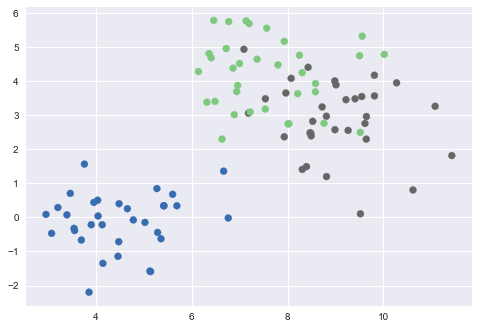

In [56]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training our model

In [57]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=3)

In [29]:
#Y_oht = one_hot(Y,2)

In [30]:
# outputs

In [58]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""

    training_loss = []
    val_loss = []
    val_acc = []

    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)

    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')

    #model.summary()
    return training_loss

In [59]:
losses = train(X,Y,model,epochs=1000)

Epoch 0 Loss 0.4725
Epoch 50 Loss 0.2132
Epoch 100 Loss 0.1981
Epoch 150 Loss 0.1857
Epoch 200 Loss 0.1688
Epoch 250 Loss 0.1457
Epoch 300 Loss 0.1294
Epoch 350 Loss 0.1207
Epoch 400 Loss 0.1163
Epoch 450 Loss 0.1199
Epoch 500 Loss 0.1154
Epoch 550 Loss 0.1133
Epoch 600 Loss 0.1115
Epoch 650 Loss 0.1097
Epoch 700 Loss 0.1118
Epoch 750 Loss 0.1121
Epoch 800 Loss 0.1122
Epoch 850 Loss 0.1124
Epoch 900 Loss 0.1072
Epoch 950 Loss 0.1141


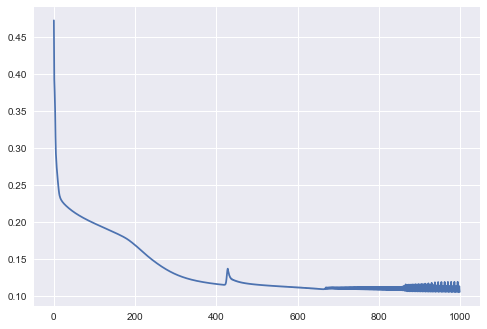

In [60]:
plt.plot(losses)

In [34]:
# find the accuracy
from visualize import plot_decision_boundary



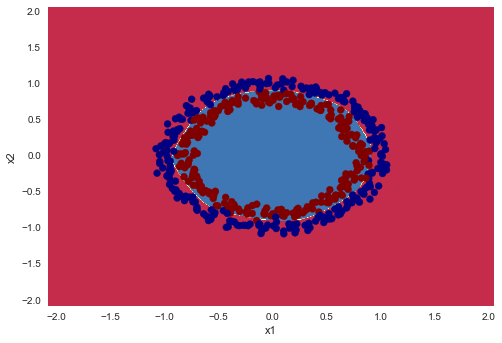

In [35]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [36]:
outputs = model.predict(X)

In [37]:
outputs

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [38]:
acc = np.sum(outputs==Y)/Y.shape[0]

In [39]:
print("Training Accuracy -->",acc)

Training Accuracy --> 0.986


### Testing on other non-linear datasets

In [40]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

### XOR dataset

In [41]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])


In [42]:
losses = train(X,Y,model,500)

Epoch 0 Loss 0.3427
Epoch 50 Loss 0.2820
Epoch 100 Loss 0.2483
Epoch 150 Loss 0.2230
Epoch 200 Loss 0.2048
Epoch 250 Loss 0.1916
Epoch 300 Loss 0.1815
Epoch 350 Loss 0.1728
Epoch 400 Loss 0.1646
Epoch 450 Loss 0.1567


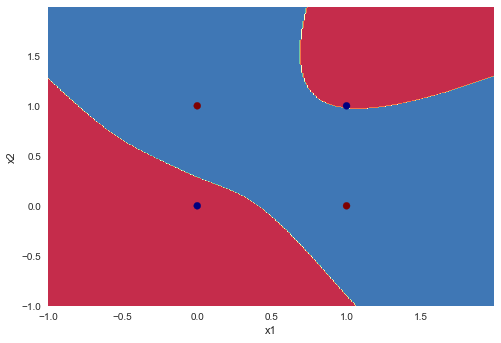

In [43]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

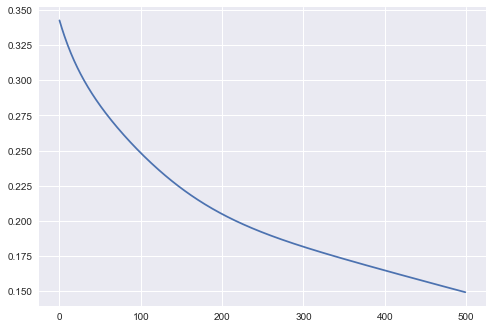

In [44]:
plt.plot(losses)


In [45]:
## Quiz -->
# x = np.linspace(-1,1)
# h11 = 1/(1+np.exp(-(400*x+24)))
# h12 = 1/(1+np.exp((400*x-24)))
# h21 = h11 - h12

In [46]:
# plt.plot(h21)

In [47]:
# for s in range(10):
#     W = int(input("Enter W"))
#     B = 2
#     h =1/(1+np.exp(-W*x-B))
#     plt.plot(h)
#     plt.show()

Other datasets

In [48]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [49]:
def load_dataset(dataset):
    if dataset == 'moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset == 'circles':
        X, Y = make_circles(n_samples=500,noise=0.2,random_state=1,factor=0.2)
    elif dataset == 'classification':
        X, Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=2)
    else:
        # Create a XOR dataset
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([0,1,1,0])

    return X,Y

Epoch 0 Loss 0.6662
Epoch 50 Loss 0.4590
Epoch 100 Loss 0.3892
Epoch 150 Loss 0.3442
Epoch 200 Loss 0.2937
Epoch 250 Loss 0.2310
Epoch 300 Loss 0.1767
Epoch 350 Loss 0.1435
Epoch 400 Loss 0.1231
Epoch 450 Loss 0.1090
Epoch 500 Loss 0.0983
Epoch 550 Loss 0.0898
Epoch 600 Loss 0.0827
Epoch 650 Loss 0.0767
Epoch 700 Loss 0.0715
Epoch 750 Loss 0.0670
Epoch 800 Loss 0.0630
Epoch 850 Loss 0.0594
Epoch 900 Loss 0.0562
Epoch 950 Loss 0.0534
Training accuracy --> 1.0
Epoch 0 Loss 0.3904
Epoch 50 Loss 0.1573
Epoch 100 Loss 0.1321
Epoch 150 Loss 0.1179
Epoch 200 Loss 0.1083
Epoch 250 Loss 0.1016
Epoch 300 Loss 0.0957
Epoch 350 Loss 0.0953
Epoch 400 Loss 0.0896
Epoch 450 Loss 0.0861
Epoch 500 Loss 0.0833
Epoch 550 Loss 0.0823
Epoch 600 Loss 0.0807
Epoch 650 Loss 0.0780
Epoch 700 Loss 0.0730
Epoch 750 Loss 0.0721
Epoch 800 Loss 0.0703
Epoch 850 Loss 0.0697
Epoch 900 Loss 0.0686
Epoch 950 Loss 0.0677
Training accuracy --> 0.952
Epoch 0 Loss 0.6050
Epoch 50 Loss 0.0606
Epoch 100 Loss 0.0488
Epoch 150

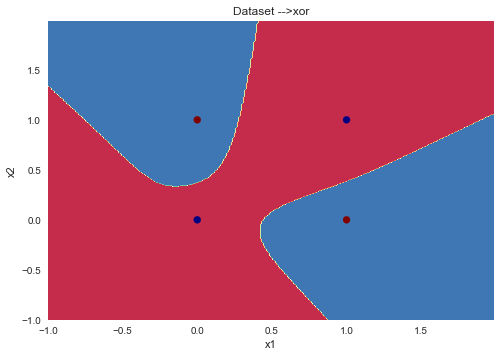

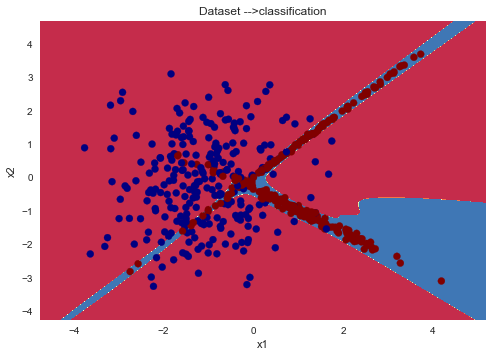

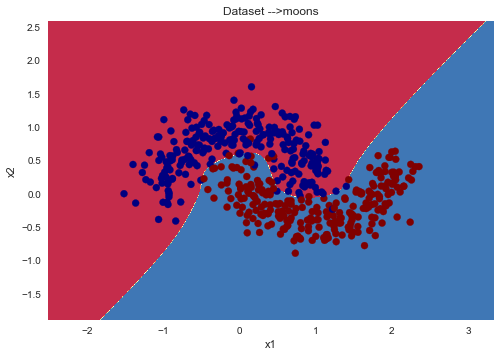

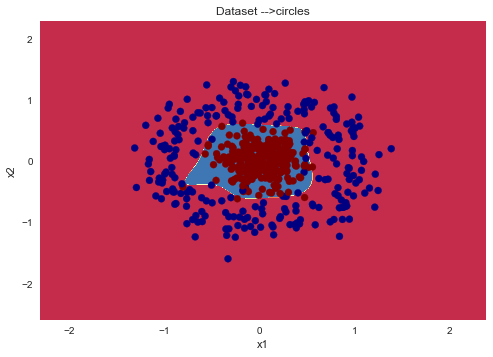

In [50]:
datasets = ['xor','classification','moons','circles']

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[12,5],output_size=2)
    X, Y =load_dataset(d)
    train(X,Y,model,1000)
    outputs = model.predict(X)

    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training accuracy -->",training_accuracy)
    plt.title('Dataset -->'+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()